<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1218]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [1219]:
#загружаем данные, очищаем от неполных строк
data = pd.read_excel('Test.xlsx', header = 0)
#очищаем от нулевых значений
data = data.dropna()
#Убираем столбец даты
data = data.drop('dt', axis=1)
data

,fpd5_flg,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
1,0,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
5,0,1,3.0,5.0,TIN,28,GMAIL.COM,Other,30000.0,Bank,iOS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [1220]:
#Проверка форматов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14073 entries, 1 to 15362
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fpd5_flg                14073 non-null  int64  
 1   gender                  14073 non-null  int64  
 2   device_quaility_index   14073 non-null  float64
 3   behavioral_index        14073 non-null  float64
 4   type_of_document        14073 non-null  object 
 5   age                     14073 non-null  int64  
 6   email_domain_formatted  14073 non-null  object 
 7   social_status           14073 non-null  object 
 8   salary                  14073 non-null  float64
 9   disbursment_type        14073 non-null  object 
 10  os                      14073 non-null  object 
 11  email_index             14073 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.4+ MB


In [1221]:
#порверка на выпадающие значения
print(data.sort_values('salary', ascending=False)['salary'].astype(int).head(20))
print(data.sort_values('age', ascending=False)['age'].astype(int))
print(data['gender'].unique())
print(data['device_quaility_index'].unique())
print(data['behavioral_index'].unique())
print(data['email_index'].unique())

1540     1500020000
8811        2387700
5082         900000
6826         800000
13821        780000
5684         550000
4527         508000
5949         480009
12650        450000
8313         450000
3421         400000
6781         380000
13017        370000
9477         350000
258          340000
1217         300000
6588         300000
3853         300000
13849        300000
4272         300000
Name: salary, dtype: int32
7351     69
7799     68
8874     68
8886     68
3556     68
         ..
1655     21
8791     21
7393     21
14238    21
4116     21
Name: age, Length: 14073, dtype: int32
[1 0]
[3. 0. 2. 4. 1.]
[4. 3. 5. 2. 6. 1.]
[ 1.  0.  8.  4.  6. 10.  2.  3. 12. 11.]


In [1222]:
#Убираем людей с чрезвычайно высокой ЗП
data=data.drop([1540, 8811, 5082, 13821, 6826])

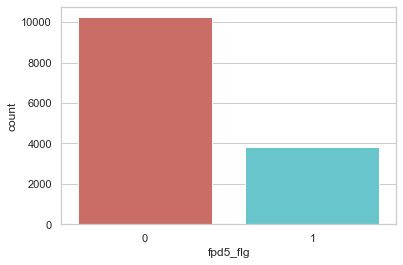

<Figure size 432x288 with 0 Axes>

In [1223]:
#Данные по результатам не сбалансированные
sns.countplot(x='fpd5_flg', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [1224]:
count_false = len(data[data['fpd5_flg']==0])
count_true = len(data[data['fpd5_flg']==1])
pct_of_false = count_false/(count_false+count_true)
print("Процент без дефолта", pct_of_false*100)
pct_of_true = count_true/(count_false+count_true)
print("Процент дефолта", pct_of_true*100)

Процент без дефолта 72.80352573215809
Процент дефолта 27.196474267841907


In [1226]:
# Проверяем, имеет ли влияние на дефолт показатели числовых факторов
data.groupby('fpd5_flg').mean()

# Из результата можно судить, что все показатели в той или иной степени могут влиять на показатель вероятности дефолта, хотя какого-то очевидно наглядного влияние не видно.

,gender,device_quaility_index,behavioral_index,age,salary,email_index
fpd5_flg,,,,,,
0,0.642746,2.423257,4.029389,35.354423,24295.642746,1.489260
1,0.582593,2.276006,4.110821,34.271040,21658.916100,1.668583


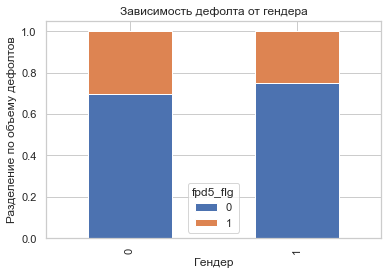

In [1227]:
table=pd.crosstab(data.gender,data.fpd5_flg)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Зависимость дефолта от гендера')
plt.xlabel('Гендер')
plt.ylabel('Разделение по объему дефолтов')
plt.savefig('mariral_vs_pur_stack')

In [1228]:
data.groupby('type_of_document').mean()
#можно наблюдать, что хоть разница и не велика, но все же определенная зависимость между предоставляемым документом и дефолтом есть. Проверим связано ли это долей и частотой предоставления того или иного документа.
#Можно предположить, что наличие того или иного документа так же отражает статус Клиента, его национальность и особенности его финансового поведения (так, например, человек с правами имеет автомобиль, что сильно влияет на его финансовое поведение)
# так что данный фактор нужно оставить

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,email_index
type_of_document,,,,,,,
Driver license ID,0.278996,0.315064,2.513083,4.081330,35.413366,26139.791726,1.513437
PRC,0.189696,0.676815,2.510539,4.000000,31.918033,24630.929742,1.451991
Passport,0.268595,0.674734,2.525974,4.083825,33.926800,25298.095041,1.319362
SSS,0.238586,0.667894,2.081001,4.013255,41.428571,23051.517673,1.868925
TIN,0.306358,0.756142,2.320809,4.046243,35.103324,22071.361994,1.466040
UMID,0.266173,0.698778,2.367114,4.041458,33.756259,22433.363509,1.583417


In [1229]:
#видим, что с частотой это не связано, т.к. UMID предоставляется в 2 раза чаще Пасспорта, но доля дефолта у обоих почти ровна.
data['type_of_document'].value_counts(normalize=True)

UMID                 0.354919
Driver license ID    0.201024
TIN                  0.196759
Passport             0.120415
SSS                  0.096531
PRC                  0.030353
Name: type_of_document, dtype: float64

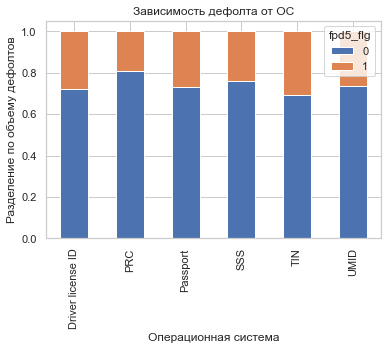

In [1230]:
table=pd.crosstab(data.type_of_document,data.fpd5_flg)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Зависимость дефолта от ОС')
plt.xlabel('Операционная система')
plt.ylabel('Разделение по объему дефолтов')
plt.savefig('mariral_vs_pur_stack')
# данные +- равны. Однако корреляция все равно, теоретически, может быть. Нужно оставить.

In [1231]:
data.groupby('social_status').mean().sort_values('fpd5_flg')
# Тут зависимость очевидная и прямая. У людей из финансовой сферы дефолт происходит в среднем в два раза реже чем у людей из ретейла. Самый частый дефолт у безработных.

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,email_index
social_status,,,,,,,
Financial Services,0.181070,0.600823,2.748971,4.032922,32.432099,27162.604938,1.333333
"Professional Worker (Doctors, Engineers, Accountants, etc.)",0.195200,0.609600,2.662400,3.974400,34.912000,29358.152000,1.318400
Government Employee,0.255382,0.668297,2.387476,4.036204,37.028376,21852.585127,1.727984
Private Company Employee,0.262315,0.548961,2.423145,4.043323,34.038279,22659.785757,1.517507
Other,0.273854,0.610905,2.208798,4.053903,35.852540,21139.529740,1.791822
BPO Professionals,0.275629,0.614209,2.649730,4.023831,30.925360,24415.154676,1.090378
Freelance,0.278378,0.570270,2.325676,4.021622,36.678378,21518.297297,1.354054
Business Owner,0.285891,0.721535,2.338490,4.077351,37.969678,31434.625619,1.748144
Self-Employed,0.301580,0.687133,2.141309,4.102032,37.088939,20729.974266,1.688488


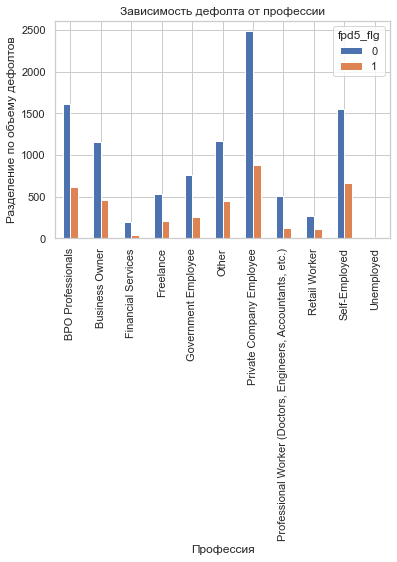

In [1232]:
pd.crosstab(data.social_status,data.fpd5_flg).plot(kind='bar')
plt.title('Зависимость дефолта от профессии')
plt.xlabel('Профессия')
plt.ylabel('Разделение по объему дефолтов')
plt.savefig('purchase_fre_job')

In [1233]:
data.groupby('os').mean().sort_values('fpd5_flg')
#тут так же предположительно может быть зависимость, т.к. у Apple более дорогое оборудование, что является статусом высокого достатка.

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,email_index
os,,,,,,,
macOS,0.150000,0.675000,3.425000,3.850000,30.675000,36425.000000,0.750000
iOS,0.233733,0.670665,3.317339,3.952381,32.531080,28653.550345,1.181389
Windows,0.262563,0.496231,3.026382,3.837940,34.991206,26741.712312,1.195980
Android,0.282752,0.624940,2.084281,4.094601,35.753177,21951.544577,1.661825
OS X,0.500000,0.000000,3.500000,4.500000,28.000000,32375.000000,0.250000
Linux,0.571429,0.428571,2.285714,4.000000,31.428571,20321.714286,0.571429
Chrome OS,0.600000,0.400000,2.600000,3.800000,31.800000,27800.000000,1.800000


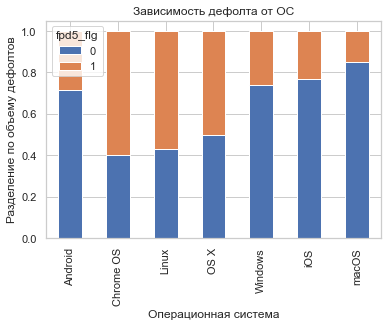

In [1234]:
table=pd.crosstab(data.os,data.fpd5_flg)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Зависимость дефолта от ОС')
plt.xlabel('Операционная система')
plt.ylabel('Разделение по объему дефолтов')
plt.savefig('mariral_vs_pur_stack')
#однако можно наблюдать, что относительно все три операционные системы примерно равны по объему дефолта. Однако это так же может быть показателем статуса - у человека есть средства на мобильный телефон под управлением apple/android.

In [1235]:
data.groupby('disbursment_type').mean().sort_values('fpd5_flg')
#Люди имеющие банковский счет, как правило, обладают большей финансовой грамотностью, т.к. процесс открытия и комисии в среднем в банка тяжелее и больше.

,fpd5_flg,gender,device_quaility_index,behavioral_index,age,salary,email_index
disbursment_type,,,,,,,
Bank,0.217324,0.610032,2.535089,4.015370,34.109496,25788.395687,1.382342
E-wallet,0.352775,0.650573,2.158590,4.105022,36.465198,20310.305022,1.768282


In [1236]:
data['disbursment_type'].value_counts(normalize=True)
# и это при том, что Банки имеют доминирующую долю

Bank        0.596602
E-wallet    0.403398
Name: disbursment_type, dtype: float64

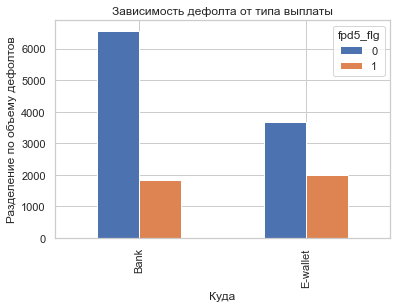

In [1237]:
pd.crosstab(data.disbursment_type,data.fpd5_flg).plot(kind='bar')
plt.title('Зависимость дефолта от типа выплаты')
plt.xlabel('Куда')
plt.ylabel('Разделение по объему дефолтов')
plt.savefig('purchase_fre_job')

In [1238]:
# Посмотрим распределение по доле тех или иных почтовых сервисов.
data['email_domain_formatted'].value_counts(normalize=True).head(10)
# GMAIL и YAHOO имеют доминирующий перевес. Не думаю, что в данном случае имеется какая-то корреляция между сервисом почты и дефолтом. Думаю данным показателем можно принебреч.


GMAIL.COM         0.785826
YAHOO.COM         0.172590
YAHOO.COM.PH      0.011871
DEPED.GOV.PH      0.006824
ICLOUD.COM        0.005971
YMAIL.COM         0.004478
ROCKETMAIL.COM    0.002488
HOTMAIL.COM       0.001493
OUTLOOK.COM       0.001208
EMAIL.COM         0.000569
Name: email_domain_formatted, dtype: float64

In [1239]:
data = data.drop('email_domain_formatted', axis=1)

In [1240]:
# Теперь вещественные столбцы приобразуем в числовые
data2=data
cat_vars=['type_of_document','social_status','disbursment_type','os']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data2[var], prefix=var)
    data1=data2.join(cat_list)
    data2=data1
cat_vars=['type_of_document','social_status','disbursment_type','os']
data_vars=data2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data2[to_keep]
data_final.columns.values

array(['fpd5_flg', 'gender', 'device_quaility_index', 'behavioral_index',
       'age', 'salary', 'email_index',
       'type_of_document_Driver license ID', 'type_of_document_PRC',
       'type_of_document_Passport', 'type_of_document_SSS',
       'type_of_document_TIN', 'type_of_document_UMID',
       'social_status_BPO Professionals', 'social_status_Business Owner',
       'social_status_Financial Services', 'social_status_Freelance',
       'social_status_Government Employee', 'social_status_Other',
       'social_status_Private Company Employee',
       'social_status_Professional Worker (Doctors, Engineers, Accountants, etc.)',
       'social_status_Retail Worker', 'social_status_Self-Employed',
       'social_status_Unemployed', 'disbursment_type_Bank',
       'disbursment_type_E-wallet', 'os_Android', 'os_Chrome OS',
       'os_Linux', 'os_OS X', 'os_Windows', 'os_iOS', 'os_macOS'],
      dtype=object)

In [1143]:
#Проверяем корреляцию между элементами
CorrKoef = data_final.corr()
list1=[]
list2=[]
for i in CorrKoef:
    b=0
    while b < len(CorrKoef[i]):
        list1.append(i + ' x ' + CorrKoef[i].index[b])
        list2.append(CorrKoef[i][b])
        b+=1
CorrKoef = pd.Series(list2, index =list1)

In [1144]:
CorrKoef.loc[CorrKoef > 0.7]
# сильная корреляция между элементами отсутствует

fpd5_flg x fpd5_flg                                                                                                                                      1.0
gender x gender                                                                                                                                          1.0
device_quaility_index x device_quaility_index                                                                                                            1.0
behavioral_index x behavioral_index                                                                                                                      1.0
age x age                                                                                                                                                1.0
salary x salary                                                                                                                                          1.0
email_index x email_index                                 

In [1145]:
#Производим балансировку с помощью библиотеки SMOTE
X = data_final.loc[:, data_final.columns != 'fpd5_flg']
y = data_final.loc[:, data_final.columns == 'fpd5_flg']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=150)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['fpd5_flg'])
# Мы можем проверить числа наших данных
print("Размер cбалансированного файла ",len(os_data_X))
print("Cбалансированое число без дефолта ",len(os_data_y[os_data_y['fpd5_flg']==0]))
print("Число с дефолтом ",len(os_data_y[os_data_y['fpd5_flg']==1]))
print("Доля без дефолта ",len(os_data_y[os_data_y['fpd5_flg']==0])/len(os_data_X))
print("Доля с дефолтом ",len(os_data_y[os_data_y['fpd5_flg']==1])/len(os_data_X))
# Теперь у нас есть идеально сбалансированные данные. Over-sampling был выполнен только для обучающих данных, поскольку в таком случае информация из тестовых данных не используется для создания синтетических сведений, и, следовательно, не произойдёт её утечки в обучающую модель.

Размер cбалансированного файла  14368
Cбалансированое число без дефолта  7184
Число с дефолтом  7184
Доля без дефолта  0.5
Доля с дефолтом  0.5


In [1146]:
#Производим рекурсивное устранение признаков. Выбрано количество элементов (n_features_to_select), при которых скоринг модели наивысший.
data_final_vars=data_final.columns.values.tolist()
y=['fpd5_flg']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=21)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
s = pd.Series(rfe.support_, index = X)
cols = s[s == True].index.tolist()
X=os_data_X[cols]
y=os_data_y['fpd5_flg']

C:\Users\nevge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nevge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [1241]:
cols

['type_of_document_Driver license ID',
 'type_of_document_PRC',
 'type_of_document_Passport',
 'type_of_document_SSS',
 'type_of_document_TIN',
 'type_of_document_UMID',
 'social_status_BPO Professionals',
 'social_status_Business Owner',
 'social_status_Financial Services',
 'social_status_Freelance',
 'social_status_Government Employee',
 'social_status_Other',
 'social_status_Private Company Employee',
 'social_status_Professional Worker (Doctors, Engineers, Accountants, etc.)',
 'social_status_Retail Worker',
 'social_status_Self-Employed',
 'social_status_Unemployed',
 'disbursment_type_Bank',
 'disbursment_type_E-wallet',
 'os_iOS',
 'os_macOS']

In [1147]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
# p-значения для большинства переменных меньше 0.05

Optimization terminated successfully.
         Current function value: 0.596062
         Iterations 6
                                                      Results: Logit
Model:                                 Logit                               Pseudo R-squared:                    0.140     
Dependent Variable:                    fpd5_flg                            AIC:                                 17170.4354
Date:                                  2022-02-24 19:45                    BIC:                                 17329.4633
No. Observations:                      14368                               Log-Likelihood:                      -8564.2   
Df Model:                              20                                  LL-Null:                             -9959.1   
Df Residuals:                          14347                               LLR p-value:                         0.0000    
Converged:                             1.0000                              Scale:          

In [1148]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Точность классификатора логистической регрессии для тестового набора: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность классификатора логистической регрессии для тестового набора: 0.79


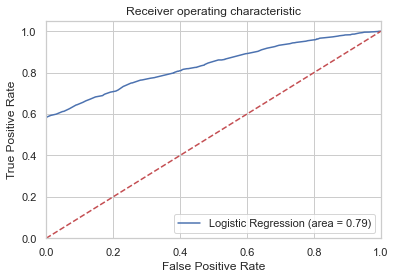

In [1149]:
#Рассчет ROC для тестового набора
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1150]:
data_final_new=X_train
list2=[]
for i in logreg.predict_proba(data_final_new):
    list2.append(i[1])
train=pd.Series(list2, index=data_final_new.index)
itog = X_train
itog['prediction'] = train

<AxesSubplot:>

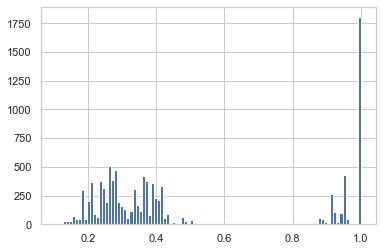

In [1151]:
# Распределение гистограммы для тестового набора
itog['prediction'].hist(bins = 100)

In [1243]:
# Создание  итогового набора
data_final_new=data_final[cols]
list1=[]
for i in logreg.predict_proba(data_final_new):
    list1.append(i[1])
train=pd.Series(list1, index=data_final_new.index)
itog = data
itog['prediction'] = train
itog.to_excel('output.xlsx')

<AxesSubplot:>

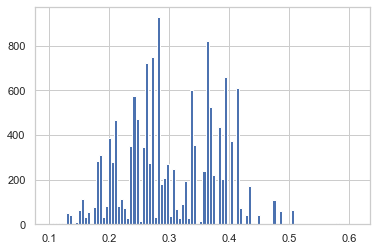

In [1242]:
# Распределение для итогового набора
itog['prediction'].hist(bins = 100)